In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Task To Do:


*   Implement the Logistic Function by completing the code or writing your own function.
*   Make sure you pass the test case.

In [2]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
  x: scalar or numpy array of any size.
  Returns:
  y: logistic function applied to x.
  """
  y = 1 / (1 + np.exp(-x))
  return y

In [28]:
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """

    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos,  "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg,"Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])

    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

# Run the test
test_logistic_function()

All tests passed!


2. Task To Do:


*   Implement the Log - loss Function by completing the code or writing your own function.
*   Make sure you pass the test case.


In [4]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1}
    and predicted target value y' in between {0-1}.

    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted target value {0-1}.

    Returns:
    loss (float): loss/error value
    """
    # Raise error for incorrect extreme predictions
    if (y_true == 1 and y_pred == 0) or (y_true == 0 and y_pred == 1):
        raise ValueError("log(0) encountered")

    # Clip y_pred to avoid log(0) for valid cases
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [5]:
# Test function:
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.1) ==> 0.10536051565782628
log loss(1, 0.9) ==> 0.10536051565782628


In [6]:
def test_log_loss():
  """
  Test cases for the log_loss function.
  """
  import numpy as np
  # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
  y_true = 1
  y_pred = 1
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
  # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
  y_true = 0
  y_pred = 0
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"
  # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 5: Partially correct prediction
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"
  print("All tests passed!")
  # Run the test case
test_log_loss()

All tests passed!


3. Task To Do:


*   Implement the Cost Function by completing the code or writing your own function.
*   Make sure you pass the test case.

In [7]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)

    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)

    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), \
        "Length of true values and length of predicted values do not match"

    n = len(y_true)

    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 0.00001, 1 - 0.00001)

    loss_vec = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    cost = np.sum(loss_vec) / n
    return cost

In [8]:
def test_cost_function():
  # Test case 1: Simple example with known expected cost
  y_true = np.array([1, 0, 1])
  y_pred = np.array([0.9, 0.1, 0.8])
  # Expected output: Manually calculate cost for these values
  # log_loss(y_true, y_pred) for each example
  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
  -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
  -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

  # Call the cost_function to get the result
  result = cost_function(y_true, y_pred)
  # Assert that the result is close to the expected cost with a tolerance of 1e-6
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
  # Run the test case
test_cost_function()

Test passed for simple case!


4. Task To Do:


*   Implement the vectorized cost function costfunction logreg Function by completing the code or writing your own function.
*   Make sure you pass the test case.

In [9]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.

    Args:
    X (ndarray, shape (m,n)): data on features, m observations with n features.
    y (array_like, shape (m,)): array of true values of target (0 or 1).
    w (array_like, shape (n,)): weight parameters of the model.
    b (float): bias parameter of the model.

    Returns:
    cost (float): nonnegative cost corresponding to y and y_pred.
    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Linear combination
    z = np.dot(X, w) + b

    # Sigmoid prediction
    y_pred = logistic_function(z)

    # Compute cost
    cost = cost_function(y, y_pred)

    return cost

In [10]:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.5000133508099065


5. Task To Do:


*   Implement the compute gradient Function by completing the code or writing your own function.
*   Make sure you pass the test case.

In [11]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.

    Args:
    X (ndarray, shape (n,d)): Input data, n observations with d features
    y (array_like, shape (n,)): True labels (0 or 1)
    w (array_like, shape (d,)): Weight parameters of the model
    b (float): Bias parameter of the model

    Returns:
    grad_w (array_like, shape (d,)): Gradient w.r.t. weights
    grad_b (float): Gradient w.r.t. bias
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Linear combination
    z = np.dot(X, w) + b

    # Sigmoid prediction
    y_pred = logistic_function(z)

    # Compute gradients
    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n

    return grad_w, grad_b

In [12]:
# Simple test case
X = np.array([[10, 20], [-10, 10]]) # shape (2, 2)
y = np.array([1, 0]) # shape (2,)
w = np.array([0.5, 1.5]) # shape (2,)
b = 1 # scalar
# Assertion tests
try:
  grad_w, grad_b = compute_gradient(X, y, w, b)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


6. Task To Do:


*   Implement the gradient descent Function by completing the code or writing your own function.
*   Make sure you pass the test case.

In [13]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update parameters
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store history
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optional printing
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

In [14]:
X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
y = np.array([1, 0]) # Shape (2,)
w = np.zeros(X.shape[1]) # Shape (2,) - same as number of features
b = 0.0 # Scalar
alpha = 0.1 # Learning rate
n_iter = 1000 # Number of iterations
# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True,
show_params=False)
# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 999: Cost = 0.460693

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460693


In [15]:
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
  y = np.array([1, 0]) # Shape (2,)
  w = np.zeros(X.shape[1]) # Shape (2,)
  b = 0.0 # Scalar
  alpha = 0.1 # Learning rate
  n_iter = 100 # Number of iterations
  # Run gradient descent
  w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False,
  show_params=False)
  # Assertions
  assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print("All tests passed!")
  # Run the test
test_gradient_descent()

All tests passed!


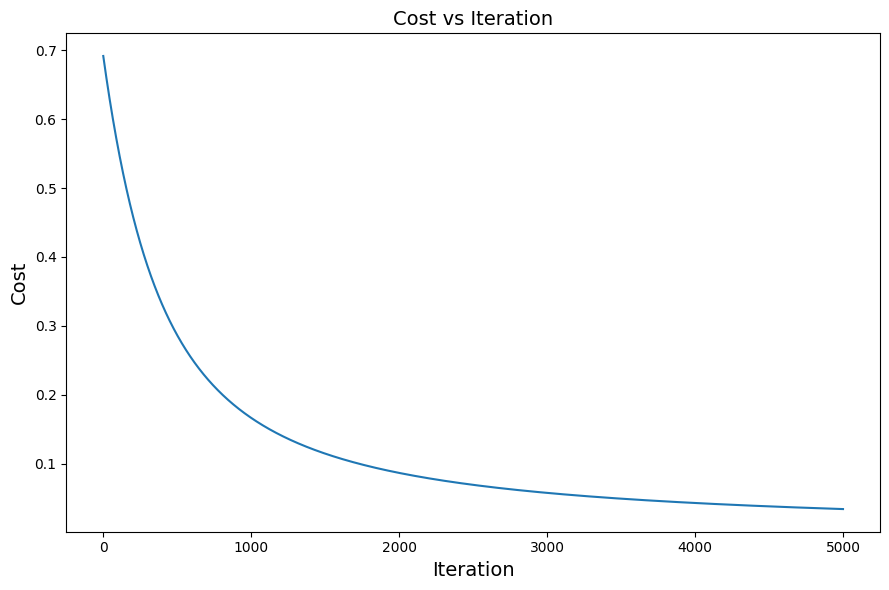

In [16]:
# 1️⃣ Prepare data and initial parameters
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.5
n_iter = 5000

# 2️⃣ Run gradient descent to get cost history
w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=False, show_params=False
)

# 3️⃣ Now plot the cost vs iteration
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

Explanation

Why we plot cost over iterations:

This plot tracks how the cost decreases over iterations, showing how well
gradient descent is converging toward a minimum.

What it tells us:
*   Confirms the optimization is progressing as expected.
*   Detects potential issues such as divergence (if cost increases or oscillates).
*   Helps in tuning hyperparameters like learning rate (alpha) and number of iterations (n_iter) for faster and stable convergence.

Effect of alpha = 0.5 and n_iter = 5000:



*   The larger learning rate causes the cost to drop faster, producing a more pronounced curve in early iterations.
*   The high number of iterations ensures the algorithm fully converges, so the tail of the curve flattens near the minimum.

7. Task To Do:


*   Implement the prediction Function by completing the code or writing your own function.
*   Make sure you pass the test case.

In [17]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Args:
    X (ndarray, shape (n,d)): Array of test features (n samples, d features)
    w (ndarray, shape (d,)): Array of learned weights
    b (float): Learned bias
    threshold (float, optional): Classification threshold (default 0.5)

    Returns:
    y_pred (ndarray, shape (n,)): Predicted binary class labels (0 or 1)
    """
    # Linear combination
    z = np.dot(X, w) + b

    # Predicted probabilities using logistic function
    y_test_prob = logistic_function(z)

    # Classify based on threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [18]:
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    expected_output = np.array([0, 1, 1])
    y_pred = prediction(X_test, w_test, b_test, threshold)

    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed!")

# Run the test
test_prediction()

Test passed!


8. Task To Do:


*   Implement evaluate classification Function by completing the code or writing your own function.
*   Make sure you pass the test case.

In [19]:
def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.

    Args:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).

    Returns:
    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
    """

    # Confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics

In [20]:
# True labels
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1])

# Predicted labels
y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1])

# Evaluate
metrics = evaluate_classification(y_true, y_pred)

print("Confusion Matrix:\n", metrics["confusion_matrix"])
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1-score:", metrics["f1_score"])

Confusion Matrix:
 [[3 1]
 [1 3]]
Precision: 0.75
Recall: 0.75
F1-score: 0.75


3.2  
Putting Helper Function to Action - Sigmoid Regression for the dataset:

Dataset Used: "pima-indians-diabetes.data.csv"

1. Some Basic Data Operation, Loading, Analysis and Cleaning:

In [21]:
#Necessary Import and Loading of the Dataset:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)
print(data_pima_diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [22]:
#Some Basic Data Cleaning:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
#Summary Statistics:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Train Test Split and Standard Scaling of the Data:

In [24]:
#Train - Test Split Followed by Standard Scaling:
# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Training of the Sigmoid Regression:


Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


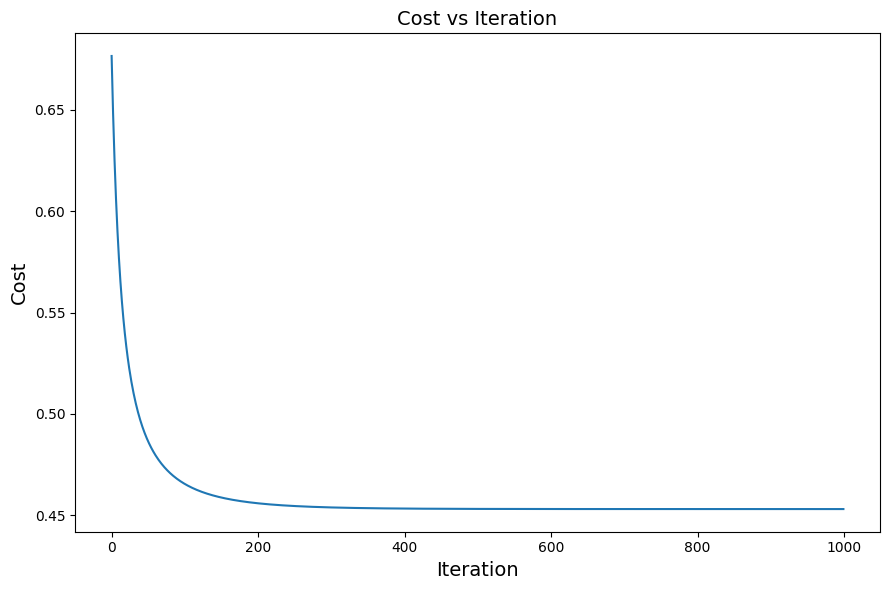

In [25]:
#Training the Model:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter,
show_cost=True, show_params=False)
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

4. Did the Model Overfitt or Underfitt?

In [26]:
#Evaluating Train and Test Performance on Cost Value:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)
# Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


5. How well my model did?

The model did well, achieving an accuracy of about 83.5% on the test set. The confusion matrix shows that it correctly classified 45 positive cases and 80 negative cases, with 5 false positives and 10 false negatives. The precision of 0.85 indicates that most predicted positive cases were correct, while the recall of 0.80 shows that the model detected the majority of actual positive cases. The F1-score of 0.825 confirms a good balance between precision and recall. Overall, the model performs reliably without significant overfitting or underfitting.

In [27]:
#Evalation on various Metrics for Classification:
# Test Accuracy
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy}%")

# Evaluate metrics
conf_matrix, precision, recall, f1 = evaluate_classification(y_test, y_test_pred)

print(f"Test Accuracy: {np.mean(y_test_pred==y_test)*100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Test Accuracy: 70.77922077922078%
Test Accuracy: 70.78%
Confusion Matrix:
confusion_matrix
Precision: precision
Recall: recall
F1-Score: f1_score
